In [1]:
import pandas as pd
import numpy as np
import glob
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('PublicDomainMissionaryTexts.xlsx')
data.shape

(84, 3)

In [3]:
data.head()

,Author,Title,Body
0,Alexander_Duff-Missions,The_Chief_End_of_the_Christian_Church-Andrew_E...,"Duff, Alexander, 1806-1878. \n\n^fesions: the ..."
1,Alexander_Duff-T,"The_Life_and_Happy_Death_of_Charlotte_Green,_A...",Cl._____ _ \n\n\n.. .. \n\n..3/-.. \n\n\n \n.....
2,Alonzo_Bunker,Sketches_From_The_Karen_Hills-Fleming_H._Revel...,\nProject Gutenberg Australia\n\nTitle: Sketch...
3,Alonzo_Bunker,"Soo_Thah,_A_Tale_of_the_Making_of_the_Karen_Na...",\nProject Gutenberg Australia\n\nTitle: Soo Th...
4,Amy_Charmichael,From_Sunrise_Land_Letters_From_Japan-Marshall_...,FROM SUNRISE LAND: LETTERS FROM JAPAN (1895)\n...


In [4]:
data.describe()

,Author,Title,Body
count,84,84,84
unique,53,83,83
top,Amy_Charmichael,"The_Last_Journals_of_David_Livingstone,_in_Cen...","DAVID LIVINGSTONE,\n\nIN CENTRAL AFRICA,\n\nFR..."
freq,13,2,2


In [5]:
#Select feature variable
X = data['Body']

In [6]:
#Data cleaning and preprocessing
def clean_text(t):
    t = str(t).lower() #making all text lowercase
    t = re.sub('\[.*?\]', '', t) #removing full stops and question marks
    t = re.sub('[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub('\w*\d\w*', '', t) #removing digits
    return t
clean = lambda x: clean_text(x)

In [7]:
Body_update = pd.DataFrame(data.Body.apply(clean))
Body_update

,Body
0,duff alexander \n\nfesions the chief end of t...
1,cl \n\n\n \n\n \n\n\n \n \n\n\n \nlort § fro...
2,\nproject gutenberg australia\n\ntitle sketche...
3,\nproject gutenberg australia\n\ntitle soo tha...
4,from sunrise land letters from japan \n\n\n\n\...
...,...
79,mary slessor\n\nof calabar\n\npioneer missiona...
80,\nof chicago \nhibraries \n\n\n\n\nalexander d...
81,\n\n\n\n\n an enquiry ...
82,the personal life\n\nof\n\ndavid livingstone\n...


In [8]:
#Another round of cleaning
def clean_text2(t):
    t = re.sub('[''""...]', '', t)
    t = re.sub('\n', '', t)
    return t
clean2 = lambda x: clean_text2(x)

In [9]:
Body_update = pd.DataFrame(data.Body.apply(clean2))
Body_update

,Body
0,"Duff, Alexander, 1806-1878 ^fesions: the chief..."
1,Cl_____ _ 3/- !l![ort §ruil5 from :l!nbia...
2,Project Gutenberg AustraliaTitle: Sketches fro...
3,Project Gutenberg AustraliaTitle: Soo Thah: _A...
4,FROM SUNRISE LAND: LETTERS FROM JAPAN (1895)By...
...,...
79,MARY SLESSOROF CALABARPIONEER MISSIONARYBYW P ...
80,of Chicago Hibraries ALEXANDER DUFF PIONEER OF...
81,AN ENQUIRY INTO THE ...
82,"THE PERSONAL LIFEOFDAVID LIVINGSTONELLD, DCLCH..."


In [10]:
data['Body_update'] = Body_update
data.drop('Body', axis=1)

,Author,Title,Body_update
0,Alexander_Duff-Missions,The_Chief_End_of_the_Christian_Church-Andrew_E...,"Duff, Alexander, 1806-1878 ^fesions: the chief..."
1,Alexander_Duff-T,"The_Life_and_Happy_Death_of_Charlotte_Green,_A...",Cl_____ _ 3/- !l![ort §ruil5 from :l!nbia...
2,Alonzo_Bunker,Sketches_From_The_Karen_Hills-Fleming_H._Revel...,Project Gutenberg AustraliaTitle: Sketches fro...
3,Alonzo_Bunker,"Soo_Thah,_A_Tale_of_the_Making_of_the_Karen_Na...",Project Gutenberg AustraliaTitle: Soo Thah: _A...
4,Amy_Charmichael,From_Sunrise_Land_Letters_From_Japan-Marshall_...,FROM SUNRISE LAND: LETTERS FROM JAPAN (1895)By...
...,...,...,...
79,W._P._Livingstone,Mary_Slessor_of_Calabar_Pioneer_Missionary-Hod...,MARY SLESSOROF CALABARPIONEER MISSIONARYBYW P ...
80,Willam_Paton,Alexander_Duff_Pioneer_of_Missionary_Education...,of Chicago Hibraries ALEXANDER DUFF PIONEER OF...
81,William_Carey,An_Enquiry_Into_The_Obligations_Of_Christians-...,AN ENQUIRY INTO THE ...
82,William_Garden_Blaikie,The_Personal_Life_of_David_Livingstone-Harper_...,"THE PERSONAL LIFEOFDAVID LIVINGSTONELLD, DCLCH..."


In [11]:
data['Body_update'][82]

"THE PERSONAL LIFEOFDAVID LIVINGSTONELLD, DCLCHIEFLY FROM HIS UNPUBLISHEDJOURNALS AND CORRESPONDENCEIN THE POSSESSION OF HIS FAMILYBYW GARDEN BLAIKIE, DD, LLDAuthor of Heroes of Israel, etc* * *PREFACEThe purpose of this work is to make the world better acquainted with the character of Livingstone His discoveries and researches have been given to the public in his own books, but his modesty led him to say little in these of himself, and those who knew him best feel that little is known of the strength of his affections, the depth and purity of his devotion, or the intensity of his aspirations as a Christian missionary The growth of his character and the providential shaping of his career are also matters of remarkable interest, of which not much has yet been made knownAn attempt has been made in this volume, likewise, to present a more complete history of his life than has yet appeared Many chapters of it are opened up of which the public have hitherto known little or nothing It has no

In [29]:
#Pickle clean data for future use.
data.to_pickle('data_clean.pkl')

In [12]:
#Removing stopwords
sw = set(stopwords.words('english'))
data['Body_update'] = data['Body_update'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))

In [13]:
#Tokenizing words
text = ' '.join(data['Body_update'])
word_tokenize = [word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english') and len(word) > 3]

In [14]:
#Take a look at the most common words in the articles
common_words = nltk.FreqDist(text).most_common
common_words

<bound method Counter.most_common of FreqDist({' ': 268751, 'e': 190599, 'n': 105638, 'i': 105597, 's': 104810, 'r': 104509, 't': 103206, 'a': 103018, 'o': 97855, 'l': 71498, ...})>

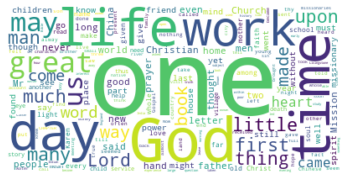

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
cloud_text = text
wordcloud = WordCloud(background_color='white').generate(cloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('PublicDomainMissionaryText.png')
plt.show()

In [16]:
data['Author Name'] = data.Author
data.drop('Author', axis=1)
data.head()

,Author,Title,Body,Body_update,Author Name
0,Alexander_Duff-Missions,The_Chief_End_of_the_Christian_Church-Andrew_E...,"Duff, Alexander, 1806-1878. \n\n^fesions: the ...","Duff, Alexander, 1806-1878 ^fesions: chief end...",Alexander_Duff-Missions
1,Alexander_Duff-T,"The_Life_and_Happy_Death_of_Charlotte_Green,_A...",Cl._____ _ \n\n\n.. .. \n\n..3/-.. \n\n\n \n.....,Cl_____ _ 3/- !l![ort §ruil5 :l!nbia; tt 11:lu...,Alexander_Duff-T
2,Alonzo_Bunker,Sketches_From_The_Karen_Hills-Fleming_H._Revel...,\nProject Gutenberg Australia\n\nTitle: Sketch...,Project Gutenberg AustraliaTitle: Sketches Kar...,Alonzo_Bunker
3,Alonzo_Bunker,"Soo_Thah,_A_Tale_of_the_Making_of_the_Karen_Na...",\nProject Gutenberg Australia\n\nTitle: Soo Th...,Project Gutenberg AustraliaTitle: Soo Thah: _A...,Alonzo_Bunker
4,Amy_Charmichael,From_Sunrise_Land_Letters_From_Japan-Marshall_...,FROM SUNRISE LAND: LETTERS FROM JAPAN (1895)\n...,FROM SUNRISE LAND: LETTERS FROM JAPAN (1895)By...,Amy_Charmichael


In [17]:
#Create a document term matrix 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.Body_update)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index
data_dtm

,00,000,000a,000on,007,008,01,023,047,0801351txtlanguage,...,zorobabel,zouch,zouga,zougachapter,zurich,zuthee,µamely,ægean,æsculapius,éclaircissement
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
#Pickle the document term matrix for future use
data_dtm.to_pickle('Mission_dtm.pkl')

In [19]:
#EDA
#Read in the pickled dtm
data_dtm_pkl = pd.read_pickle('Mission_dtm.pkl')
data_dtm_pkl = data_dtm_pkl.transpose()
data_dtm_pkl.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000on,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Top 30 words usesd by each writer
top_dict = {}
for c in data_dtm_pkl.columns:
    top = data_dtm_pkl[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict    

{0: [('church', 66),
  ('end', 37),
  ('world', 27),
  ('christian', 26),
  ('chief', 25),
  ('missions', 19),
  ('nations', 18),
  ('light', 17),
  ('thy', 16),
  ('god', 15),
  ('spirit', 15),
  ('divine', 15),
  ('great', 13),
  ('spiritual', 12),
  ('grand', 12),
  ('evangelistic', 11),
  ('gospel', 10),
  ('earth', 10),
  ('way', 9),
  ('unto', 9),
  ('sun', 9),
  ('functions', 8),
  ('shall', 8),
  ('true', 8),
  ('missionary', 8),
  ('ought', 8),
  ('blessings', 8),
  ('christ', 7),
  ('lord', 7),
  ('bless', 7)],
 1: [('life', 24),
  ('god', 24),
  ('charlotte', 22),
  ('little', 22),
  ('children', 21),
  ('laing', 19),
  ('child', 19),
  ('green', 18),
  ('death', 18),
  ('miss', 17),
  ('happy', 15),
  ('jesus', 12),
  ('woman', 11),
  ('young', 11),
  ('said', 10),
  ('lord', 10),
  ('love', 10),
  ('great', 10),
  ('sabbath', 9),
  ('day', 9),
  ('heaven', 9),
  ('come', 9),
  ('shall', 9),
  ('grace', 9),
  ('people', 8),
  ('sins', 8),
  ('land', 8),
  ('oh', 8),
  ('bro

In [21]:
#print the top 15 words used by each author
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
church, end, world, christian, chief, missions, nations, light, thy, god, spirit, divine, great, spiritual
---
1
life, god, charlotte, little, children, laing, child, green, death, miss, happy, jesus, woman, young
---
2
karen, people, toungoo, work, village, loikaw, tribes, men, karens, journey, karenni, god, missionary, christian
---
3
thah, soo, great, father, people, like, life, story, near, house, jungle, little, nats, tree
---
4
jesus, little, lord, god, light, life, holy, home, like, church, shall, great, time, old
---
5
god, come, caste, oh, little, away, fight, lord, life, people, words, day, women, woman
---
6
forest, little, children, brownie, like, green, day, water, child, things, long, story, eyes, house
---
7
chellalu, bala, little, babies, like, flowers, morning, children, time, nursery, good, thought, things, lotus
---
8
thy, thou, thee, things, hast, god, know, great, lord, river, shall, thine, word, heart
---
9
came, day, time, little, children, money, room, years, 

In [22]:
#Look at the most common top words and add them to the stop word list
from collections import Counter

#Pull out the top 30 words for each author
words = []
for author in data_dtm_pkl.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
words

['church',
 'end',
 'world',
 'christian',
 'chief',
 'missions',
 'nations',
 'light',
 'thy',
 'god',
 'spirit',
 'divine',
 'great',
 'spiritual',
 'grand',
 'evangelistic',
 'gospel',
 'earth',
 'way',
 'unto',
 'sun',
 'functions',
 'shall',
 'true',
 'missionary',
 'ought',
 'blessings',
 'christ',
 'lord',
 'bless',
 'life',
 'god',
 'charlotte',
 'little',
 'children',
 'laing',
 'child',
 'green',
 'death',
 'miss',
 'happy',
 'jesus',
 'woman',
 'young',
 'said',
 'lord',
 'love',
 'great',
 'sabbath',
 'day',
 'heaven',
 'come',
 'shall',
 'grace',
 'people',
 'sins',
 'land',
 'oh',
 'brought',
 'soon',
 'karen',
 'people',
 'toungoo',
 'work',
 'village',
 'loikaw',
 'tribes',
 'men',
 'karens',
 'journey',
 'karenni',
 'god',
 'missionary',
 'christian',
 'large',
 'good',
 'country',
 'life',
 'dr',
 'years',
 'days',
 'long',
 'young',
 'red',
 'mission',
 'native',
 'way',
 'took',
 'great',
 'wild',
 'thah',
 'soo',
 'great',
 'father',
 'people',
 'like',
 'life',
 '

In [23]:
#Aggregate the list and identify most common words along each article
Counter(words).most_common()

[('god', 60),
 ('life', 50),
 ('great', 49),
 ('time', 49),
 ('work', 43),
 ('day', 41),
 ('little', 39),
 ('years', 39),
 ('man', 36),
 ('missionary', 34),
 ('lord', 30),
 ('mr', 30),
 ('new', 28),
 ('men', 23),
 ('came', 23),
 ('church', 22),
 ('said', 22),
 ('home', 22),
 ('heart', 22),
 ('way', 21),
 ('people', 21),
 ('dr', 21),
 ('mission', 20),
 ('father', 20),
 ('christian', 19),
 ('children', 19),
 ('china', 19),
 ('christ', 18),
 ('long', 18),
 ('like', 18),
 ('old', 18),
 ('young', 16),
 ('good', 16),
 ('prayer', 16),
 ('mrs', 16),
 ('days', 15),
 ('come', 14),
 ('chinese', 14),
 ('world', 13),
 ('spirit', 13),
 ('things', 13),
 ('shall', 12),
 ('mother', 12),
 ('child', 11),
 ('went', 11),
 ('rev', 11),
 ('chapter', 11),
 ('gospel', 10),
 ('death', 10),
 ('love', 10),
 ('house', 10),
 ('faith', 10),
 ('women', 10),
 ('india', 10),
 ('thought', 10),
 ('book', 10),
 ('mind', 10),
 ('school', 10),
 ('missions', 9),
 ('woman', 9),
 ('story', 9),
 ('native', 8),
 ('word', 8),
 ('

In [24]:
#if more than half of the authors have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 42]
add_stop_words

['god', 'life', 'great', 'time', 'work']

In [28]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#Recreate document term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data.Body_update)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data.index

#pickle it for later use
import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [25]:
#Create word clouds for each Author
wc = WordCloud(stopwords=sw, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]
authors = data['Author Name']

ValueError: num must be 1 <= num <= 12, not 13

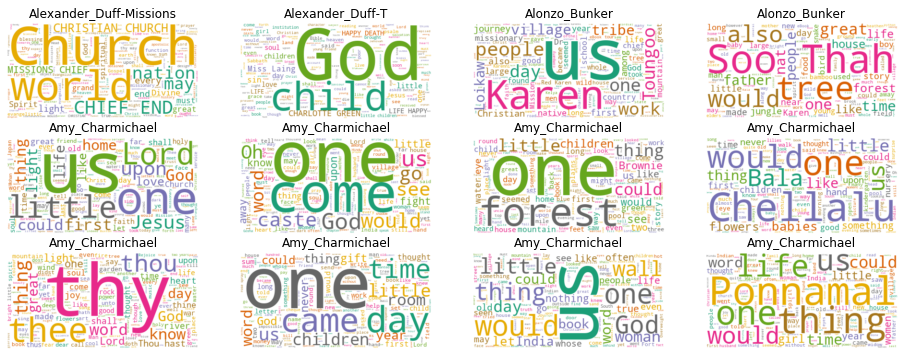

In [26]:
#create subplots for each Author
for index, author in enumerate(data_dtm_pkl.columns):
    wc.generate(data.Body_update[author])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(authors[index])
    
plt.show()    

In [ ]:
#Find the number of unique words used by each author
unique_list = []
for author in data_dtm_pkl.columns:
    uniques = data_dtm_pkl[author].nonzero()[0].size
    unique_list.append(uniques)
    
#create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(authors, unique_list)), columns=['Author', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

In [ ]:
#plot unique words
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Author)
plt.title('Number of Unique words', fontsize= 20)
plt.savefig('Unique_words_mission_texts.png')
plt.show()

In [ ]:
#Carry out sentiment analysis
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Body_update'].apply(pol)
data['subjectivity'] = data['Body_update'].apply(sub)

In [ ]:
data

In [ ]:
#As expected all sentiments are positive

In [ ]:
#plottitng the results
plt.rcParams['figure.figsize'] = [10, 8]
for index, author in enumerate(data.index):
    x = data.polarity.loc[author]
    y = data.subjectivity.loc[author]
    plt.scatter(x, y, color = 'blue')
    plt.text(x+.001, y+.001, data['Author Name'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize= 20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize = 15)
plt.savefig('Sentiment_analysis_mission_text.png')
plt.show()